# Modeling

## Import the Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

import xgboost as xgb
import lightgbm as lgbm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error

## Import the Data

In [2]:
df = pd.read_csv("simple_imputed_df.csv")
df.head()

,id,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,City,State,review_scores_rating,reviews_per_month,bathrooms
0,1489424,5294164,1.0,100.0,87.0,0,1,FOURTEENTH WARD,42.66719,-73.81580,...,248,50,6,0,1,albany,ny,4.75,1.94,1.0
1,2992450,4621559,3.0,100.0,100.0,0,0,THIRD WARD,42.65789,-73.75370,...,9,0,0,0,1,albany,ny,3.56,0.08,1.0
2,3820211,19648678,1.0,100.0,66.0,0,1,SIXTH WARD,42.65222,-73.76724,...,292,8,1,0,4,albany,ny,4.74,2.51,1.0
3,5651579,29288920,1.0,100.0,99.0,0,1,SECOND WARD,42.64615,-73.75966,...,337,31,4,0,2,albany,ny,4.51,3.13,1.0
4,6623339,19648678,1.0,100.0,66.0,0,1,SIXTH WARD,42.65222,-73.76724,...,306,5,0,0,4,albany,ny,4.73,2.87,1.0


In [3]:
model_cols = ["host_response_rate", "host_acceptance_rate", "latitude", "longitude", "accommodates", "beds", "number_of_reviews", "number_of_reviews_ltm",
              "review_scores_rating", "reviews_per_month", "bathrooms", "price"]

model_df = df[model_cols]
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253798 entries, 0 to 253797
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   host_response_rate     253798 non-null  float64
 1   host_acceptance_rate   253798 non-null  float64
 2   latitude               253798 non-null  float64
 3   longitude              253798 non-null  float64
 4   accommodates           253798 non-null  int64  
 5   beds                   253798 non-null  float64
 6   number_of_reviews      253798 non-null  int64  
 7   number_of_reviews_ltm  253798 non-null  int64  
 8   review_scores_rating   253798 non-null  float64
 9   reviews_per_month      253798 non-null  float64
 10  bathrooms              253798 non-null  float64
 11  price                  253798 non-null  float64
dtypes: float64(9), int64(3)
memory usage: 23.2 MB


## Prepare the Data for Modeling

In [4]:
X = model_df.drop(["price"], axis = 1)
y = model_df["price"]

X.shape, y.shape

((253798, 11), (253798,))

In [5]:
# Split the data into train and test sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((228418, 11), (25380, 11), (228418,), (25380,))

## Creating Baseline Models

### Linear Regression

In [6]:
# Train the model using training set.

linear_regressor = LinearRegression()

linear_regressor.fit(X_train, y_train)

lr_train_preds = linear_regressor.predict(X_train)

print(f"Mean Absolute Error for Training data: {mean_absolute_error(y_train, lr_train_preds)}")
print(f"Root Mean Squared Error for Training data: {mean_squared_error(y_train, lr_train_preds)**0.5}")

Mean Absolute Error for Training data: 96.98994406998814
Root Mean Squared Error for Training data: 150.98518074295237


In [7]:
# Evaluating the linear model on the test set.

lr_test_preds = linear_regressor.predict(X_test)

print(f"Mean Absolute Error for Test data: {mean_absolute_error(y_test, lr_test_preds)}")
print(f"Root Mean Squared Error for Test_data: {mean_squared_error(y_test, lr_test_preds)**0.5}")

Mean Absolute Error for Test data: 96.52169943401785
Root Mean Squared Error for Test_data: 151.53116914903327


In [8]:
# From the train and test results we can see that the model is underfitting. So let's increase the complexity of the models.

In [10]:
# Creating a function to display the train and test metrics.

def display_results(model, y_train, train_preds, y_test, test_preds):

  train_mae = mean_absolute_error(y_train, train_preds)
  train_rmse = mean_squared_error(y_train, train_preds)**0.5

  test_mae = mean_absolute_error(y_test, test_preds)
  test_rmse = mean_squared_error(y_test, test_preds)**0.5

  model_name = model.__class__.__name__

  print(f"Results for {model_name}:")

  print(f"Mean Absolute Error for Training data: {train_mae}")
  print(f"Root Mean Squared Error for Training data: {train_rmse}")

  print(f"Mean Absolute Error for Test data: {test_mae}")
  print(f"Root Mean Squared Error for Test_data: {test_rmse}")

  return {"Model": model_name,
          "Train MAE": train_mae,
          "Train RMSE": train_rmse,
          "Test MAE": test_mae,
          "Test RMSE": test_rmse}

In [11]:
lr_results = display_results(linear_regressor, y_train, lr_train_preds, y_test, lr_test_preds)

Results for LinearRegression:
Mean Absolute Error for Training data: 96.98994406998814
Root Mean Squared Error for Training data: 150.98518074295237
Mean Absolute Error for Test data: 96.52169943401785
Root Mean Squared Error for Test_data: 151.53116914903327


### Decision Tree

In [12]:
dtr_model = DecisionTreeRegressor()

dtr_model.fit(X_train, y_train)


dtr_train_preds = dtr_model.predict(X_train)

dtr_test_preds = dtr_model.predict(X_test)

dtr_results = display_results(dtr_model, y_train, dtr_train_preds, y_test, dtr_test_preds)

Results for DecisionTreeRegressor:
Mean Absolute Error for Training data: 0.48209903668818554
Root Mean Squared Error for Training data: 7.0477477638819535
Mean Absolute Error for Test data: 86.22628399805463
Root Mean Squared Error for Test_data: 155.74679174372764


In [13]:
# The training results are great but the test results shows that the model actually overfitted. Let's see if we can regularize the model.

In [14]:
dtr_model = DecisionTreeRegressor(max_depth = 15, min_samples_split = 40, min_samples_leaf = 10, min_impurity_decrease=0.0001)

dtr_model.fit(X_train, y_train)


dtr_train_preds = dtr_model.predict(X_train)

dtr_test_preds = dtr_model.predict(X_test)

dtr_results = display_results(dtr_model, y_train, dtr_train_preds, y_test, dtr_test_preds)

Results for DecisionTreeRegressor:
Mean Absolute Error for Training data: 68.42112964693702
Root Mean Squared Error for Training data: 113.00513635766617
Mean Absolute Error for Test data: 75.92046078309431
Root Mean Squared Error for Test_data: 127.13960401631445


In [15]:
# Looks like with a little bit of tuning (Just hand picked) the important parameters improved the model significantly. Restricting the model brought the balance between the training and
# test performance.

In [16]:
# Let's see if we can keep on increasing the complexity of models and see how far we can go.

### Random Forest Regressor

In [17]:
rfr_model = RandomForestRegressor()

rfr_model.fit(X_train, y_train)


rfr_train_preds = rfr_model.predict(X_train)

rfr_test_preds = rfr_model.predict(X_test)

rfr_results = display_results(rfr_model, y_train, rfr_train_preds, y_test, rfr_test_preds)

Results for RandomForestRegressor:
Mean Absolute Error for Training data: 24.67246655097594
Root Mean Squared Error for Training data: 42.539202153558435
Mean Absolute Error for Test data: 65.21323863881696
Root Mean Squared Error for Test_data: 111.69040907585652


In [18]:
# Again we can see that the model is overfitting. So we need to tune the model parameters to balance the performance between the train and test.

In [20]:
rfr_model = RandomForestRegressor(n_estimators=100, max_depth = 15, min_samples_split = 40, min_samples_leaf = 10)

rfr_model.fit(X_train, y_train)


rfr_train_preds = rfr_model.predict(X_train)

rfr_test_preds = rfr_model.predict(X_test)

rfr_results = display_results(rfr_model, y_train, rfr_train_preds, y_test, rfr_test_preds)

Results for RandomForestRegressor:
Mean Absolute Error for Training data: 66.16403129132135
Root Mean Squared Error for Training data: 109.7510213513815
Mean Absolute Error for Test data: 71.5391782846473
Root Mean Squared Error for Test_data: 119.44647252423212


### XGBoost

In [21]:
xgb_model = xgb.XGBRegressor()

xgb_model.fit(X_train, y_train)

xgb_train_preds = xgb_model.predict(X_train)

xgb_test_preds = xgb_model.predict(X_test)

xgb_results = display_results(xgb_model, y_train, xgb_train_preds, y_test, xgb_test_preds)

Results for XGBRegressor:
Mean Absolute Error for Training data: 68.48331940377535
Root Mean Squared Error for Training data: 111.82330613427105
Mean Absolute Error for Test data: 70.94348557915295
Root Mean Squared Error for Test_data: 117.32826736524217


In [22]:
# It took a very few seconds for training XGB model compared to RandomForest model. And also the performance on test set (generalization) is better than the previous models.

### LightGBM

In [23]:
lgbm_model = lgbm.LGBMRegressor(num_iterations = 1000)

lgbm_model.fit(X_train, y_train)

lgbm_train_preds = lgbm_model.predict(X_train)

lgbm_test_preds = lgbm_model.predict(X_test)

lgbm_results = display_results(lgbm_model, y_train, lgbm_train_preds, y_test, lgbm_test_preds)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1649
[LightGBM] [Info] Number of data points in the train set: 228418, number of used features: 11
[LightGBM] [Info] Start training from score 209.698605
Results for LGBMRegressor:
Mean Absolute Error for Training data: 62.47449897109193
Root Mean Squared Error for Training data: 101.27313024706014
Mean Absolute Error for Test data: 67.66559344076553
Root Mean Squared Error for Test_data: 112.34979929177572


In [24]:
# Light GBM outperformed all other baseline models. It reduces the errors and also ensured generalization.

In [25]:
# Let's compare the results of all the baseline models.

In [26]:
results_df = pd.DataFrame([lr_results, dtr_results, rfr_results, xgb_results, lgbm_results])
results_df

,Model,Train MAE,Train RMSE,Test MAE,Test RMSE
0,LinearRegression,96.989944,150.985181,96.521699,151.531169
1,DecisionTreeRegressor,68.421130,113.005136,75.920461,127.139604
2,RandomForestRegressor,66.164031,109.751021,71.539178,119.446473
3,XGBRegressor,68.483319,111.823306,70.943486,117.328267
4,LGBMRegressor,62.474499,101.273130,67.665593,112.349799


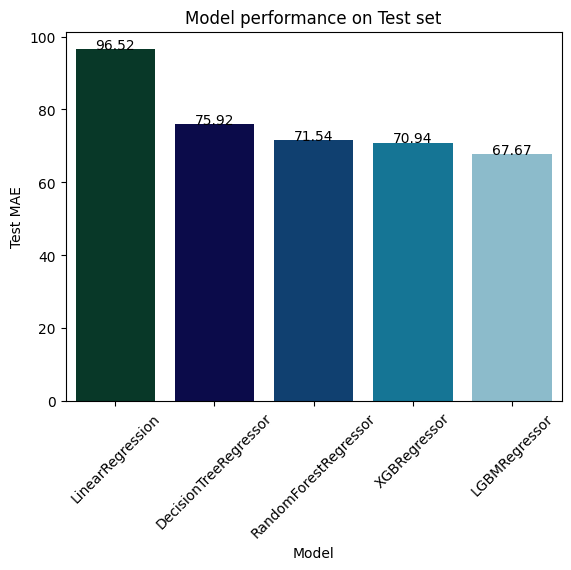

In [45]:
sns.barplot(x = "Model", y = "Test MAE", data = results_df, palette = "ocean")
plt.title("Model performance on Test set")
plt.xticks(ticks = results_df["Model"], rotation = 45)

for i in range(5):
    plt.text(i, results_df["Test MAE"][i], f"{results_df['Test MAE'][i]:.2f}", ha="center")

plt.show()